### Project description

This project is about visualizing insights from expenses data provided from Privatbank bank statements.

Goals: 
- predict missing categories and clean up the data
- understand the most frequent expense
- find out the most costly category
- find out the weekday on which most money is spend
- find out the hour, or time range on which most money is spend
- predict last 50 expenses with logistic regression, compare with the real expenses


## Step 1: Explore the data

In [1]:
import numpy as np
import pandas as pd


### This data is my spendings for 2016-2017 years, when I was using only PrivatBank

#### The data is taken from the privat24 system - I just downloaded it as .xls files and merged them

It contains 600+ transactions and it's more informative then the data I had before

In [2]:
df = pd.read_csv("new_statements.csv")

In [3]:
df.head()

,Дата,Час,Категорія,Картка,Опис операції,Сума у валюті картки,Валюта картки,Сума у валюті транзакції,Валюта транзакції,Залишок на кінець періоду,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,01.06.2017,23:30,Перекази,Картка Універсальна (****2297),Переказ з карти ПриватБанку через додаток Прив...,49.00,грн,49.00,грн,540.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01.06.2017,18:52,Продукти харчування,Картка Універсальна (****2297),"Продукти: ЕЛIТ КЛУБ, Львiв, вул. Луцького, 12",-39.00,грн,39.00,грн,491.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01.06.2017,14:48,Туризм,Картка Універсальна (****2297),"Залізничні послуги: WWW.UZ.GOV.UA, KYIV",-183.72,грн,183.72,грн,530.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01.06.2017,13:23,"Кафе, бари, ресторани",Картка Універсальна (****2297),"Ресторан: Кафе ""Креденс"", м Львів, вул Валова, 5",-98.00,грн,98.00,грн,714.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01.06.2017,12:00,Перекази,Картка Універсальна (****2297),Переказ на карту ПриватБанку через додаток При...,-201.00,грн,200.00,грн,812.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

Дата                          object
Час                           object
Категорія                     object
Картка                        object
Опис операції                 object
Сума у валюті картки         float64
Валюта картки                 object
Сума у валюті транзакції     float64
Валюта транзакції             object
Залишок на кінець періоду    float64
Валюта залишку                object
Unnamed: 11                   object
Unnamed: 12                   object
Unnamed: 13                   object
Unnamed: 14                   object
Unnamed: 15                   object
Unnamed: 16                  float64
Unnamed: 17                   object
Unnamed: 18                  float64
Unnamed: 19                   object
Unnamed: 20                  float64
Unnamed: 21                   object
dtype: object

## Step 2: Clean the data

Dropping columns that don't have important info, or the info is constant
Or Unnamed columns with NANs

In [5]:
df = df.drop(columns=["Валюта картки",
                      "Валюта залишку", "Картка",
                      "Unnamed: 11", "Unnamed: 12",
                      "Unnamed: 13", "Unnamed: 14",
                      "Unnamed: 15",  "Unnamed: 16",
                      "Unnamed: 17", "Unnamed: 18",
                      "Unnamed: 19",  "Unnamed: 20",
                      "Unnamed: 21"])

In [6]:
df.head()

,Дата,Час,Категорія,Опис операції,Сума у валюті картки,Сума у валюті транзакції,Валюта транзакції,Залишок на кінець періоду
0,01.06.2017,23:30,Перекази,Переказ з карти ПриватБанку через додаток Прив...,49.00,49.00,грн,540.31
1,01.06.2017,18:52,Продукти харчування,"Продукти: ЕЛIТ КЛУБ, Львiв, вул. Луцького, 12",-39.00,39.00,грн,491.31
2,01.06.2017,14:48,Туризм,"Залізничні послуги: WWW.UZ.GOV.UA, KYIV",-183.72,183.72,грн,530.31
3,01.06.2017,13:23,"Кафе, бари, ресторани","Ресторан: Кафе ""Креденс"", м Львів, вул Валова, 5",-98.00,98.00,грн,714.03
4,01.06.2017,12:00,Перекази,Переказ на карту ПриватБанку через додаток При...,-201.00,200.00,грн,812.03


### Renaming columns
There is a problem with ukrainian language in my system - so I'd rename everything I can to English

In [7]:
df.rename(columns={'Дата': 'date',
                     'Час':'time',
                     'Категорія':'category',
                     'Опис операції':'description',
                     'Сума у валюті картки':'transaction',
                     'Сума у валюті транзакції':'abs',
                     'Валюта транзакції':'currency',
                     'Залишок на кінець періоду':'balance',
                    }, 
                 inplace=True)

In [8]:
df.head()

,date,time,category,description,transaction,abs,currency,balance
0,01.06.2017,23:30,Перекази,Переказ з карти ПриватБанку через додаток Прив...,49.00,49.00,грн,540.31
1,01.06.2017,18:52,Продукти харчування,"Продукти: ЕЛIТ КЛУБ, Львiв, вул. Луцького, 12",-39.00,39.00,грн,491.31
2,01.06.2017,14:48,Туризм,"Залізничні послуги: WWW.UZ.GOV.UA, KYIV",-183.72,183.72,грн,530.31
3,01.06.2017,13:23,"Кафе, бари, ресторани","Ресторан: Кафе ""Креденс"", м Львів, вул Валова, 5",-98.00,98.00,грн,714.03
4,01.06.2017,12:00,Перекази,Переказ на карту ПриватБанку через додаток При...,-201.00,200.00,грн,812.03


### Understanding the data

Here I'd look at the transaction descriptions to understand the data better

In [9]:
descriptions = df.description.unique()
for description in descriptions:
    print(description)

Переказ з карти ПриватБанку через додаток Приват24. Відправник: Мазуркевич Тарас Андрійович
Продукти: ЕЛIТ КЛУБ, Львiв, вул. Луцького, 12
Залізничні послуги: WWW.UZ.GOV.UA, KYIV
Ресторан: Кафе "Креденс", м Львів, вул Валова, 5
Переказ на карту ПриватБанку через додаток Приват24. Одержувач: Мазуркевич Тарас Андрійович
Ресторан: TRAPEZNA UKU, LVIV
Зняття готівки в банкоматі: KREDOBANK, LVIV
Переказ з карти ПриватБанку через додаток Приват24. Відправник: Баценко Катерина Валеріївна
Переказ з карти ПриватБанку через додаток Приват24. Відправник: Козак Олександр Андрійович
 ПОКУПКА ТОВАРА
LiqPay. Переказ з карти на карту від 28-05-2017 ID платежу 420840975
Переказ на карту ПриватБанку через додаток Приват24. Одержувач: Макарова Катерина Сергіївна
Продукти: Супермаркет Фуршет, м Львів, вул Сахарова, 45
Зарахування переказу з картки ПриватБанку через додаток Приват24
Продукти: NIKA ZAHID, LVIV
Зняття готівки в банкоматі: ST. KHUTORIVKA,4B ST., LVOV
Продукти: Сiльпо, Львiв, вул. Городоцька, 17

### List of categories of transactions

In [10]:
categs = df.category.unique()
print('Number of categories', len(categs))
for category in categs:
    print(category)

('Number of categories', 12)
Перекази
Продукти харчування
Туризм
Кафе, бари, ресторани
Видача готівки
Інше
Поповнення мобільного
Здоров'я
Розваги
Комунальні послуги
Одяг, взуття
Скарбничка/депозити


### From the list of categories we see that there is 'Інше' category - this means that PrivatBank can't classify the category
#### Let's see, how many categories are labled as  'Інше' right now

In [11]:
df.loc[df['category'] == 'Інше']

,date,time,category,description,transaction,abs,currency,balance
11,29.05.2017,14:19,Інше,ПОКУПКА ТОВАРА,-51.93,51.93,грн,33.03
12,29.05.2017,14:15,Інше,ПОКУПКА ТОВАРА,-55.35,55.35,грн,84.96
35,21.05.2017,14:37,Інше,ПОКУПКА ТОВАРА,-78.77,78.77,грн,1157.06
47,15.05.2017,22:40,Інше,ПОКУПКА ТОВАРА,-48.40,48.29,грн,156.56
48,15.05.2017,17:25,Інше,"Навчання: PAYPAL *GARAGE48FOU, 4029357733",-152.39,151.67,грн,204.96
87,02.05.2017,18:31,Інше,"Книги/ЗМІ: KNYGARNYA E, LVIV",-377.83,377.83,грн,471.64
93,02.05.2017,08:49,Інше,Поповнення депозиту 2635**8693,-300.00,300.00,грн,374.47
101,29.04.2017,22:45,Інше,ПОКУПКА ТОВАРА,-32.45,32.44,грн,1097.32
102,29.04.2017,22:36,Інше,ПОКУПКА ТОВАРА,-31.91,31.81,грн,1129.77
103,29.04.2017,15:52,Інше,Переказ з карти ПриватБанку через додаток Прив...,360.00,360.00,грн,1161.68


In [12]:
df.loc[df['category'] == 'Інше'].count()

date           41
time           41
category       41
description    41
transaction    41
abs            41
currency       41
balance        41
dtype: int64

### Understanding the keywords in transaction description and renaming them

Now by looking at the descriptions of transactions I can identify the keywords that will help to create new, more specific categories, moreover the same process will help to classify transactions that fall into 'Інше' category and give them category names

In [13]:
df.head(50)

,date,time,category,description,transaction,abs,currency,balance
0,01.06.2017,23:30,Перекази,Переказ з карти ПриватБанку через додаток Прив...,49.00,49.00,грн,540.31
1,01.06.2017,18:52,Продукти харчування,"Продукти: ЕЛIТ КЛУБ, Львiв, вул. Луцького, 12",-39.00,39.00,грн,491.31
2,01.06.2017,14:48,Туризм,"Залізничні послуги: WWW.UZ.GOV.UA, KYIV",-183.72,183.72,грн,530.31
3,01.06.2017,13:23,"Кафе, бари, ресторани","Ресторан: Кафе ""Креденс"", м Львів, вул Валова, 5",-98.00,98.00,грн,714.03
4,01.06.2017,12:00,Перекази,Переказ на карту ПриватБанку через додаток При...,-201.00,200.00,грн,812.03
5,01.06.2017,11:58,"Кафе, бари, ресторани","Ресторан: TRAPEZNA UKU, LVIV",-18.00,18.00,грн,1013.03
6,01.06.2017,11:55,Видача готівки,"Зняття готівки в банкоматі: KREDOBANK, LVIV",-101.00,100.00,грн,1031.03
7,01.06.2017,08:19,"Кафе, бари, ресторани","Ресторан: TRAPEZNA UKU, LVIV",-10.50,10.50,грн,1132.03
8,31.05.2017,14:54,"Кафе, бари, ресторани","Ресторан: TRAPEZNA UKU, LVIV",-22.50,22.50,грн,1142.53
9,31.05.2017,13:00,Перекази,Переказ з карти ПриватБанку через додаток Прив...,1000.00,1000.00,грн,1165.03


### From this data I'd divide the data into following categories based on various description: 
- TRAVEL - everything related to the railway or flight tickets, or hotels, or transactions that already have 'Туризм' category
- FOOD - all transactions related to buying something is supermarket
- FUN - monthly subscription to the music, cinema tickets, transactions that already have 'Розваги' category
- CLOTHES - buying something in a clothes store, corresponding keywords in description or already marked with appropriate category
- CAFE - eating out in a cafe or restorant or coffee
- TAXI - uklon, uber, or other taxi rides - defined from description
- PUBLIC TRANSPORT - subway or tram rides - keywords availible in the description.
- MONEY TRANSFER - transfer from one card to another. 
- HEALTH - pharmacy & medcenter transactions

#### Notice, that some transactions have category 'Інше' but at the same time enough information in the description to predict it's true category.

Let's define some description keywords which will be used as a category names later on.

In [14]:
df['description'] = df['description'].replace(
    {
        'Ресторан': 'CAFE',
        'Кафе': 'CAFE',
        'Кава': 'CAFE',
        'Туризм': 'TRAVEL',
        'Залізничні': 'TRAVEL',
        'Готель': 'TRAVEL',
        'Продукти': 'FOOD',
        'Сильпо': 'FOOD',
        'Продукти харчування': 'FOOD',
        'Музика': 'FUN',
        'Розваги': 'FUN',
        'KINOMARKET': 'FUN',
        'Одяг': 'CLOTHES',
        'ЛИМУЗИНЫ': 'TAXI',
        'UKLON': 'TAXI',
        'Uber': 'TAXI',
        'UBER': 'TAXI',
        'Таксі': 'TAXI',
        'Здоров\'я': 'HEALTH',
        'Медицина': 'HEALTH',
        'Аптека': 'HEALTH',
        'Послуги туризму та транспортних перевезень': 'PUBLIC TRANSPORT',
        'Переказ': 'MONEY TRANSFER',
        'Перекази': 'MONEY TRANSFER',
        'переказу': 'MONEY TRANSFER'
    }, regex=True)

### Label categories where possible

In [15]:
df.loc[df.description.str.contains("TAXI"), "category"] = "TAXI"

In [16]:
df.loc[df.description.str.contains("FOOD"), "category"] = "FOOD"
df.loc[df.description.str.contains("Продукти харчування"), "category"] = "FOOD"

In [17]:
df.loc[df.description.str.contains("FUN"), "category"] = "FUN"
df.loc[df.category.str.contains("Розваги"), "category"] = "FUN"

In [18]:
df.loc[df.description.str.contains("CLOTHES"), "category"] = "CLOTHES"

In [19]:
df.loc[df.description.str.contains("CAFE"), "category"] = "CAFE"

In [20]:
df.loc[df.description.str.contains("TRAVEL"), "category"] = "TRAVEL"
df.loc[df.category.str.contains("Туризм"), "category"] = "TRAVEL"

In [21]:
df.loc[df.description.str.contains("PUBLIC TRANSPORT"), "category"] = "PUBLIC TRANSPORT"

In [22]:
df.loc[df.description.str.contains("TRAPEZNA"), "category"] = "TRAPEZNA"

In [23]:
df.loc[df.description.str.contains("MONEY TRANSFER"), "category"] = "MONEY TRANSFER"
df.loc[df.description.str.contains("Перекази"), "category"] = "MONEY TRANSFER"

In [24]:
df.loc[df.description.str.contains("HEALTH"), "category"] = "HEALTH"

In [25]:
df.head(200)

,date,time,category,description,transaction,abs,currency,balance
0,01.06.2017,23:30,MONEY TRANSFER,MONEY TRANSFER з карти ПриватБанку через додат...,49.00,49.00,грн,540.31
1,01.06.2017,18:52,FOOD,"FOOD: ЕЛIТ КЛУБ, Львiв, вул. Луцького, 12",-39.00,39.00,грн,491.31
2,01.06.2017,14:48,TRAVEL,"TRAVEL послуги: WWW.UZ.GOV.UA, KYIV",-183.72,183.72,грн,530.31
3,01.06.2017,13:23,CAFE,"CAFE: CAFE ""Креденс"", м Львів, вул Валова, 5",-98.00,98.00,грн,714.03
4,01.06.2017,12:00,MONEY TRANSFER,MONEY TRANSFER на карту ПриватБанку через дода...,-201.00,200.00,грн,812.03
5,01.06.2017,11:58,TRAPEZNA,"CAFE: TRAPEZNA UKU, LVIV",-18.00,18.00,грн,1013.03
6,01.06.2017,11:55,Видача готівки,"Зняття готівки в банкоматі: KREDOBANK, LVIV",-101.00,100.00,грн,1031.03
7,01.06.2017,08:19,TRAPEZNA,"CAFE: TRAPEZNA UKU, LVIV",-10.50,10.50,грн,1132.03
8,31.05.2017,14:54,TRAPEZNA,"CAFE: TRAPEZNA UKU, LVIV",-22.50,22.50,грн,1142.53
9,31.05.2017,13:00,MONEY TRANSFER,MONEY TRANSFER з карти ПриватБанку через додат...,1000.00,1000.00,грн,1165.03


##### See how many columns now have 'Інше' category

In [26]:
df.loc[df['category'] == 'Інше']

,date,time,category,description,transaction,abs,currency,balance
11,29.05.2017,14:19,Інше,ПОКУПКА ТОВАРА,-51.93,51.93,грн,33.03
12,29.05.2017,14:15,Інше,ПОКУПКА ТОВАРА,-55.35,55.35,грн,84.96
35,21.05.2017,14:37,Інше,ПОКУПКА ТОВАРА,-78.77,78.77,грн,1157.06
47,15.05.2017,22:40,Інше,ПОКУПКА ТОВАРА,-48.40,48.29,грн,156.56
48,15.05.2017,17:25,Інше,"Навчання: PAYPAL *GARAGE48FOU, 4029357733",-152.39,151.67,грн,204.96
87,02.05.2017,18:31,Інше,"Книги/ЗМІ: KNYGARNYA E, LVIV",-377.83,377.83,грн,471.64
93,02.05.2017,08:49,Інше,Поповнення депозиту 2635**8693,-300.00,300.00,грн,374.47
101,29.04.2017,22:45,Інше,ПОКУПКА ТОВАРА,-32.45,32.44,грн,1097.32
102,29.04.2017,22:36,Інше,ПОКУПКА ТОВАРА,-31.91,31.81,грн,1129.77
150,03.04.2017,20:10,Інше,Поповнення депозиту 2635**8693,-300.00,300.00,грн,1085.38


In [27]:
df.loc[df['category'] == 'Інше'].count()

date           33
time           33
category       33
description    33
transaction    33
abs            33
currency       33
balance        33
dtype: int64

### Go through identifying keywords again to reduce 'інше'

For example, transactions with 'JYSK' word in description are related to buying something for house / room
I'll create a new category called 'HOUSING' for such transactions 

In [28]:
df['description'] = df['description'].replace(
    {
        'JYSK': 'HOUSING',
        'Книги': 'BOOKS',
        'Подарунки': 'PRESENTS',
        'Косметика': 'HEALTH', 
        'канцтоварів': 'HOUSING',
        'Поповнення депозиту': 'SAVINGS',
        'поштові': 'MAIL', 
        'Навчання': 'EDU'
    }, regex=True)

### Adding new categories for the defined keywords

In [29]:
df.loc[df.description.str.contains("HOUSING"), "category"] = "HOUSING"
df.loc[df.description.str.contains("BOOKS"), "category"] = "BOOKS"
df.loc[df.description.str.contains("PRESENTS"), "category"] = "PRESENTS"
df.loc[df.description.str.contains("HEALTH"), "category"] = "HEALTH"
df.loc[df.description.str.contains("SAVINGS"), "category"] = "SAVINGS"
df.loc[df.description.str.contains("MAIL"), "category"] = "MAIL"
df.loc[df.description.str.contains("EDU"), "category"] = "EDU"

## Let's see how many transactions are left in 'Інше' category by now...

In [30]:
df.loc[df['category'] == 'Інше'].count()

date           15
time           15
category       15
description    15
transaction    15
abs            15
currency       15
balance        15
dtype: int64

In [31]:
df.loc[df['category'] == 'Інше']

,date,time,category,description,transaction,abs,currency,balance
11,29.05.2017,14:19,Інше,ПОКУПКА ТОВАРА,-51.93,51.93,грн,33.03
12,29.05.2017,14:15,Інше,ПОКУПКА ТОВАРА,-55.35,55.35,грн,84.96
35,21.05.2017,14:37,Інше,ПОКУПКА ТОВАРА,-78.77,78.77,грн,1157.06
47,15.05.2017,22:40,Інше,ПОКУПКА ТОВАРА,-48.40,48.29,грн,156.56
101,29.04.2017,22:45,Інше,ПОКУПКА ТОВАРА,-32.45,32.44,грн,1097.32
102,29.04.2017,22:36,Інше,ПОКУПКА ТОВАРА,-31.91,31.81,грн,1129.77
164,27.03.2017,16:59,Інше,Поповнення готівкою в терміналі самообслуговув...,1400.00,1400.00,грн,1641.57
202,09.03.2017,14:18,Інше,"Телеком послуги: Privat24 Android MTS, ID плат...",-18.20,18.20,грн,1760.00
222,27.02.2017,17:24,Інше,Поповнення готівкою в терміналі самообслуговув...,600.00,600.00,грн,637.57
344,17.12.2016,12:17,Інше,ПОКУПКА ТОВАРА,-35.00,35.00,грн,725.12


## Result: reduced transactions with 'Інше' category form 41 to 15: reduced by 63% !


## Let's look at categories list now: 


In [32]:
categories = df.category.unique()
for categ in categories:
    print(categ)

MONEY TRANSFER
FOOD
TRAVEL
CAFE
TRAPEZNA
Видача готівки
Інше
Поповнення мобільного
HEALTH
EDU
FUN
TAXI
Продукти харчування
BOOKS
SAVINGS
MAIL
PRESENTS
Комунальні послуги
CLOTHES
Скарбничка/депозити
HOUSING


### We see that SAVINGS and 'Скарбничка/депозити' could be grouped, everything else could be renamed to English if it's still in URK

In [33]:
df.loc[df.category.str.contains("Скарбничка/депозити"), "category"] = "SAVINGS"
df.loc[df.category.str.contains("Продукти харчування"), "category"] = "FOOD"
df.loc[df.category.str.contains("Комунальні послуги"), "category"] = "HOUSING"
df.loc[df.category.str.contains("Поповнення мобільного"), "category"] = "PHONE BILLS"
df.loc[df.category.str.contains("Інше"), "category"] = "OTHER"
df.loc[df.category.str.contains("Видача готівки"), "category"] = "CASH"

In [34]:
categories = df.category.unique()
for categ in categories:
    print(categ)

MONEY TRANSFER
FOOD
TRAVEL
CAFE
TRAPEZNA
CASH
OTHER
PHONE BILLS
HEALTH
EDU
FUN
TAXI
BOOKS
SAVINGS
MAIL
PRESENTS
HOUSING
CLOTHES


# Now it's time for behaviour exploration

### Plot balance through time

In [35]:
import numpy as np

Populating the interactive namespace from numpy and matplotlib


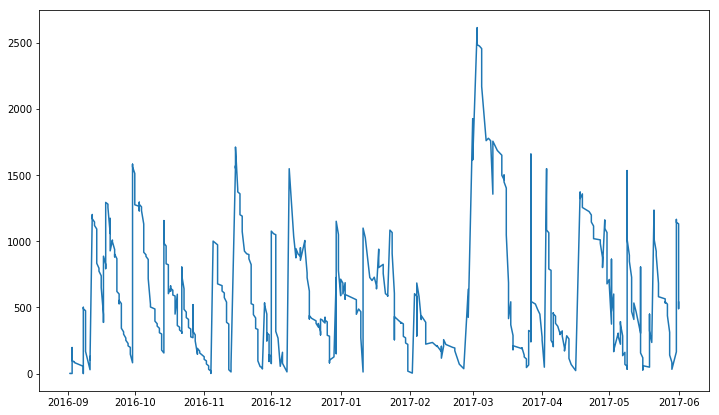

In [36]:
import matplotlib.pyplot as plt
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 7)   # Change the size of plots
 
from datetime import datetime
date_objects = [datetime.strptime(date, '%d.%m.%Y').date() for date in df.date]
plt.plot(date_objects, df.balance)


### Add weekdays to the data

In [37]:
import pandas as pd

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = [weekdays[date.weekday()] for date in date_objects]


#### Sum of transactions

In [38]:
df['transaction'].sum()

2663.79

### Grouping expenses by categories

In [39]:
categories = df.category.unique()
for categ in categories:
    print(categ)

MONEY TRANSFER
FOOD
TRAVEL
CAFE
TRAPEZNA
CASH
OTHER
PHONE BILLS
HEALTH
EDU
FUN
TAXI
BOOKS
SAVINGS
MAIL
PRESENTS
HOUSING
CLOTHES


In [40]:
for categ in categories: 
    print(categ)
    print(df.loc[df['category'] == categ].transaction.sum())
    print()

MONEY TRANSFER
28170.239999999998
()
FOOD
-4656.24
()
TRAVEL
-3096.8100000000004
()
CAFE
-3345.99
()
TRAPEZNA
-4944.84
()
CASH
-5878.2
()
OTHER
2652.0
()
PHONE BILLS
-637.55
()
HEALTH
-1343.26
()
EDU
-152.39
()
FUN
-240.0
()
TAXI
-612.26
()
BOOKS
-660.18
()
SAVINGS
-1800.0
()
MAIL
-57.0
()
PRESENTS
-267.0
()
HOUSING
-292.73
()
CLOTHES
-174.0
()


### From what we see there are both incomes and expenses, for now, our main point of interest are expenses. 

In [41]:
df.head()

,date,time,category,description,transaction,abs,currency,balance,weekday
0,01.06.2017,23:30,MONEY TRANSFER,MONEY TRANSFER з карти ПриватБанку через додат...,49.00,49.00,грн,540.31,Thursday
1,01.06.2017,18:52,FOOD,"FOOD: ЕЛIТ КЛУБ, Львiв, вул. Луцького, 12",-39.00,39.00,грн,491.31,Thursday
2,01.06.2017,14:48,TRAVEL,"TRAVEL послуги: WWW.UZ.GOV.UA, KYIV",-183.72,183.72,грн,530.31,Thursday
3,01.06.2017,13:23,CAFE,"CAFE: CAFE ""Креденс"", м Львів, вул Валова, 5",-98.00,98.00,грн,714.03,Thursday
4,01.06.2017,12:00,MONEY TRANSFER,MONEY TRANSFER на карту ПриватБанку через дода...,-201.00,200.00,грн,812.03,Thursday


In [42]:
df.transaction.sum()

2663.79

In [43]:
expenses = df[df.category != "Перекази"]
expenses = expenses[expenses.category != "MONEY TRANSFER"]

In [44]:
expenses.transaction.sum()

-25506.45

### Now we have only expenses and finally can understand where did the money go.

In [45]:
expenses_by_category = [] # let's create a dictionary;

categories = expenses.category.unique()
for categ in categories: 
    print(categ)
    expense = expenses.loc[expenses['category'] == categ].transaction.sum()
    print(expense)
    expenses_by_category.append(abs(expense))
    print("_______________")



FOOD
-4656.24
_______________
TRAVEL
-3096.8100000000004
_______________
CAFE
-3345.99
_______________
TRAPEZNA
-4944.84
_______________
CASH
-5878.2
_______________
OTHER
2652.0
_______________
PHONE BILLS
-637.55
_______________
HEALTH
-1343.26
_______________
EDU
-152.39
_______________
FUN
-240.0
_______________
TAXI
-612.26
_______________
BOOKS
-660.18
_______________
SAVINGS
-1800.0
_______________
MAIL
-57.0
_______________
PRESENTS
-267.0
_______________
HOUSING
-292.73
_______________
CLOTHES
-174.0
_______________


In [46]:
expenses_by_category
categs = []

for categ in categories: 
    categs.append(categ)
categs

['FOOD',
 'TRAVEL',
 'CAFE',
 'TRAPEZNA',
 'CASH',
 'OTHER',
 'PHONE BILLS',
 'HEALTH',
 'EDU',
 'FUN',
 'TAXI',
 'BOOKS',
 'SAVINGS',
 'MAIL',
 'PRESENTS',
 'HOUSING',
 'CLOTHES']

Text(0,0.5,u'Transaction Type')

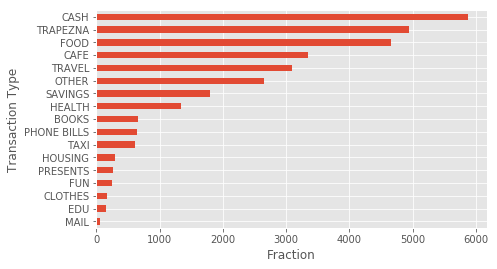

In [47]:
EXPENSES_CAT = pd.Series(expenses_by_category, 
                        index=categs)
df_EXP = pd.DataFrame({'expenses' : EXPENSES_CAT})
df_EXP = df_EXP.sort_values(by='expenses', ascending=True)

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7,4))
df_EXP.plot(kind='barh', legend = False, ax=ax)
ax.set_xlabel('Fraction')
ax.set_ylabel('Transaction Type')


Text(0,0.5,u'')

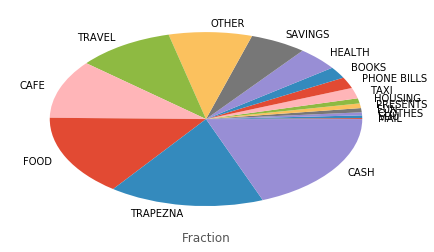

In [48]:
fig, ax = plt.subplots(figsize=(7,4))
df_EXP.plot(kind='pie', legend = False, ax=ax, subplots=True)
ax.set_xlabel('Fraction')
ax.set_ylabel('')

# Results

### The place where I spend money most frequently

In [49]:
most_frequent_desc = df['description'].value_counts().idxmax()

In [50]:
print(most_frequent_desc)
print("Spent money there {} times".format(len(df[df['description'] == most_frequent_desc])))
print("\nAmount spend there: ")
df[df.description == most_frequent_desc].transaction.sum()


CAFE: TRAPEZNA UKU, LVIV
Spent money there 211 times

Amount spend there: 


-4944.84

### The  most frequent category 

In [51]:
most_frequent_category = df['category'].value_counts().idxmax()

In [52]:
print("The most frequent category of transactions is {}".format(most_frequent_category))
transactions_amount = len(df[df['category'] == most_frequent_category])
df_len = len(df)

percentage = float(transactions_amount) / float(df_len)

print("Amount of such transactions: {}".format(transactions_amount))
print("Relative percentage of such transactions: {}%".format(percentage * 100))

The most frequent category of transactions is TRAPEZNA
Amount of such transactions: 211
Relative percentage of such transactions: 32.7639751553%


### Find out the weekday on which most money is spend


In [53]:
weekday_expenses = []
mean_weekday_expenses = []

for day in weekdays: 
    expense = expenses.loc[expenses['weekday'] == day].transaction.sum()
    mean_expense = expenses.loc[expenses['weekday'] == day].transaction.mean()
    weekday_expenses.append(abs(expense))
    mean_weekday_expenses.append(abs(mean_expense))
    print("On {}s I spend {} uah in total \n".format(day, abs(expense)))

On Mondays I spend 532.26 uah in total 

On Tuesdays I spend 4744.57 uah in total 

On Wednesdays I spend 3798.34 uah in total 

On Thursdays I spend 3253.16 uah in total 

On Fridays I spend 4057.17 uah in total 

On Saturdays I spend 4744.21 uah in total 

On Sundays I spend 4376.74 uah in total 



### Total sum spend within each weekday

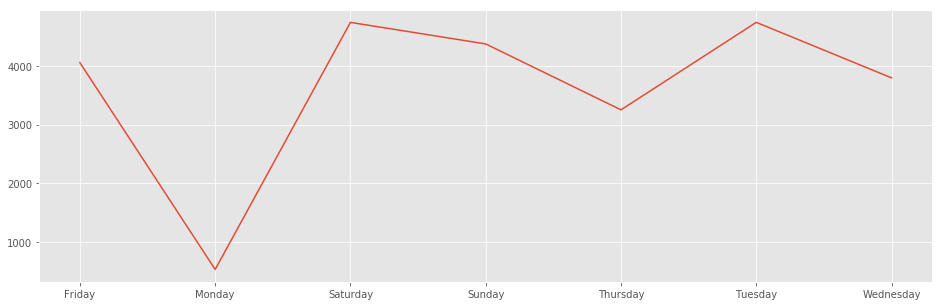

In [54]:
fig, ax = plt.subplots(figsize=(16,5))
plt.plot(expenses.groupby(['weekday'])['transaction'].sum().abs())


### Mean sum spend within each weekday


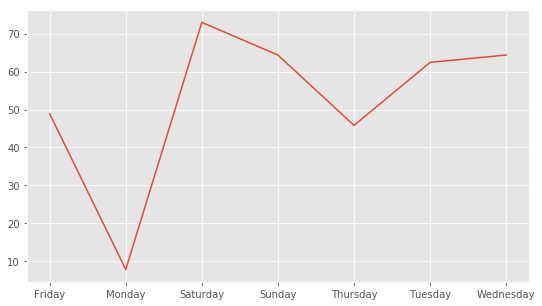

In [55]:
fig, ax = plt.subplots(figsize=(9,5))
plt.plot(expenses.groupby(['weekday'])['transaction'].mean().abs())

### Find out the hour, or time range on which most money is spend


#### Create time ranges column

In [56]:
time_ranges = ["{}{}:00 - {}{}:59".format(i // 10, i % 10, (i + 1) // 10, (i + 1) % 10 ) for i in range(0, 24, 2)]
time_ranges

['00:00 - 01:59',
 '02:00 - 03:59',
 '04:00 - 05:59',
 '06:00 - 07:59',
 '08:00 - 09:59',
 '10:00 - 11:59',
 '12:00 - 13:59',
 '14:00 - 15:59',
 '16:00 - 17:59',
 '18:00 - 19:59',
 '20:00 - 21:59',
 '22:00 - 23:59']

In [57]:
times = [int("".join(list(time)[:2])) for time in expenses.time[:10]]
times

[18, 14, 13, 11, 11, 8, 14, 14, 14, 15]

In [58]:
expenses['time_range'] = [time_ranges[int("".join(list(time)[:2])) // 2] for time in expenses.time]
expenses.head()

,date,time,category,description,transaction,abs,currency,balance,weekday,time_range
1,01.06.2017,18:52,FOOD,"FOOD: ЕЛIТ КЛУБ, Львiв, вул. Луцького, 12",-39.00,39.00,грн,491.31,Thursday,18:00 - 19:59
2,01.06.2017,14:48,TRAVEL,"TRAVEL послуги: WWW.UZ.GOV.UA, KYIV",-183.72,183.72,грн,530.31,Thursday,14:00 - 15:59
3,01.06.2017,13:23,CAFE,"CAFE: CAFE ""Креденс"", м Львів, вул Валова, 5",-98.00,98.00,грн,714.03,Thursday,12:00 - 13:59
5,01.06.2017,11:58,TRAPEZNA,"CAFE: TRAPEZNA UKU, LVIV",-18.00,18.00,грн,1013.03,Thursday,10:00 - 11:59
6,01.06.2017,11:55,CASH,"Зняття готівки в банкоматі: KREDOBANK, LVIV",-101.00,100.00,грн,1031.03,Thursday,10:00 - 11:59


In [59]:
 expenses.groupby(['time_range'])['transaction'].sum().abs()

time_range
00:00 - 01:59      64.60
06:00 - 07:59     132.91
08:00 - 09:59    3219.30
10:00 - 11:59    4332.80
12:00 - 13:59    2546.49
14:00 - 15:59    3978.63
16:00 - 17:59    2989.49
18:00 - 19:59    3973.95
20:00 - 21:59    2835.06
22:00 - 23:59    1433.22
Name: transaction, dtype: float64

### Total sum spend within each time range

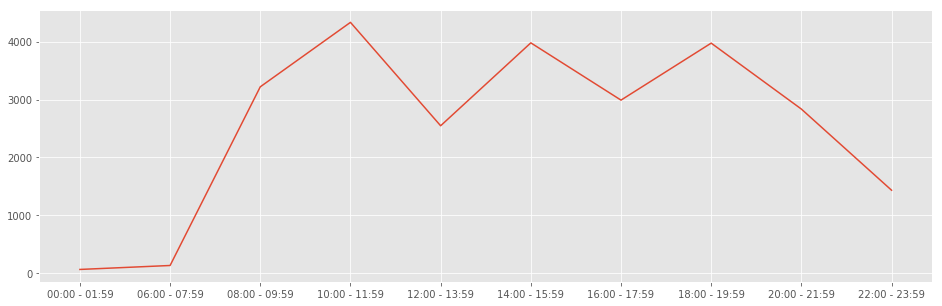

In [60]:
fig, ax = plt.subplots(figsize=(16,5))
plt.plot(expenses.groupby(['time_range'])['transaction'].sum().abs())


### Mean sum spend within each time range
Seems like I spend most of my money during the evening

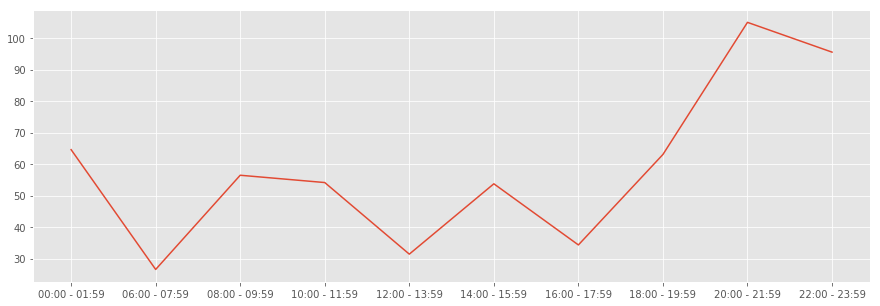

In [61]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(expenses.groupby(['time_range'])['transaction'].mean().abs())

## Mean spendings withing each time range FOR EACH category

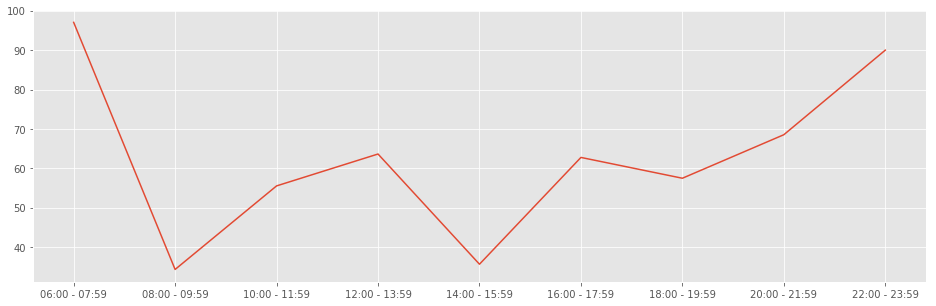

In [62]:
fig, ax = plt.subplots(figsize=(16,5))
plt.plot(expenses.loc[expenses['category'] == 'FOOD'].groupby(['time_range'])['transaction'].mean().abs())

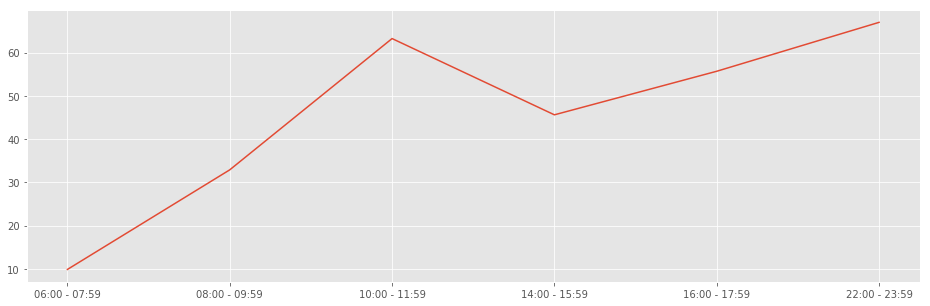

In [63]:
fig, ax = plt.subplots(figsize=(16,5))
plt.plot(expenses.loc[expenses['category'] == 'TAXI'].groupby(['time_range'])['transaction'].mean().abs())

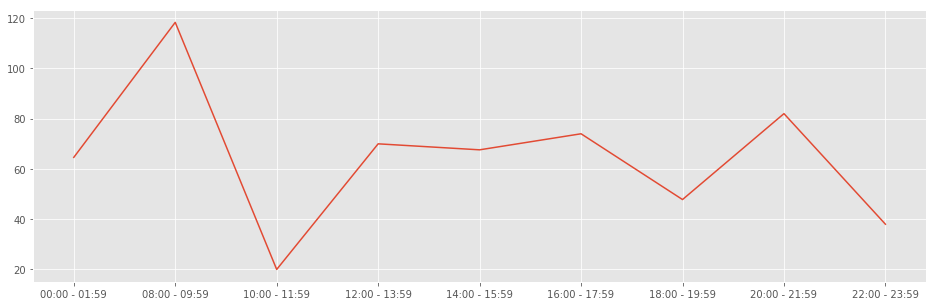

In [64]:
fig, ax = plt.subplots(figsize=(16,5))
plt.plot(expenses.loc[expenses['category'] == 'CAFE'].groupby(['time_range'])['transaction'].mean().abs())

In [65]:
expenses.loc[expenses['category'] == 'CAFE']

,date,time,category,description,transaction,abs,currency,balance,weekday,time_range
3,01.06.2017,13:23,CAFE,"CAFE: CAFE ""Креденс"", м Львів, вул Валова, 5",-98.00,98.00,грн,714.03,Thursday,12:00 - 13:59
14,28.05.2017,15:23,CAFE,"CAFE: CAFE ""Креденс"", м Львів, вул Валова, 5",-49.00,49.00,грн,146.34,Sunday,14:00 - 15:59
50,15.05.2017,15:07,CAFE,"CAFE: СIЛЬПО, Київ, пр-т П.Тичини, 1В",-167.81,167.81,грн,372.70,Monday,14:00 - 15:59
96,30.04.2017,21:09,CAFE,"CAFE: CAFE Кабiнет, Львiв, Винниченко, 12",-145.00,145.00,грн,678.52,Sunday,20:00 - 21:59
100,30.04.2017,09:11,CAFE,"CAFE: Арома CAFE, Львiв, вул. Генерала Чупринк...",-31.00,31.00,грн,1066.32,Sunday,08:00 - 09:59
116,19.04.2017,17:00,CAFE,"CAFE: PIZZA CELENTANO, LVIV",-44.00,44.00,грн,1255.50,Wednesday,16:00 - 17:59
124,13.04.2017,14:39,CAFE,"CAFE: KAVYARNYA-KNYGARNYA, ODESA",-24.00,24.00,грн,262.27,Thursday,14:00 - 15:59
126,11.04.2017,18:17,CAFE,"CAFE: McDonald's 004, KYIV",-23.00,23.00,грн,171.27,Tuesday,18:00 - 19:59
127,11.04.2017,13:23,CAFE,"CAFE: CAFE Момо, м Київ, пл Контрактова, 2/1",-90.00,90.00,грн,194.27,Tuesday,12:00 - 13:59
128,10.04.2017,20:42,CAFE,"CAFE: Лапша Бар, Київ, пл. Бесарабська, 2",-39.00,39.00,грн,284.27,Monday,20:00 - 21:59


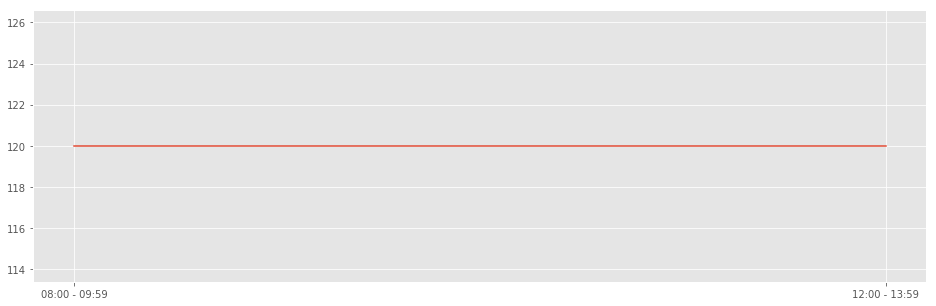

In [66]:
fig, ax = plt.subplots(figsize=(16,5))
plt.plot(expenses.loc[expenses['category'] == 'FUN'].groupby(['time_range'])['transaction'].mean().abs())

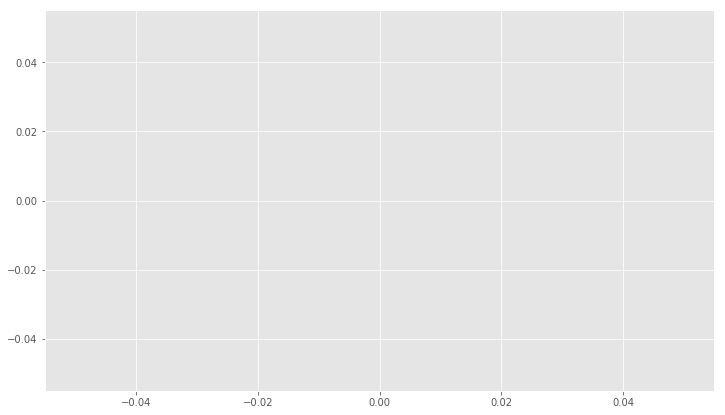

In [67]:
plt.plot(expenses.loc[expenses['category'] == 'Видача готівки'].groupby(['time_range'])['transaction'].mean().abs())

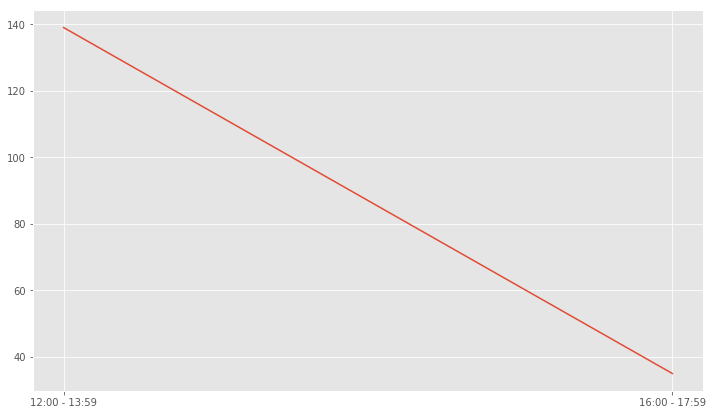

In [68]:
plt.plot(expenses.loc[expenses['category'] == 'CLOTHES'].groupby(['time_range'])['transaction'].mean().abs())

## Predicting category by given description
this could be used for avoiding manual category classification for another data from PrivatBank - if potentially other users would like to know their spendings behaviour

In [69]:
categories

array(['FOOD', 'TRAVEL', 'CAFE', 'TRAPEZNA', 'CASH', 'OTHER',
       'PHONE BILLS', 'HEALTH', 'EDU', 'FUN', 'TAXI', 'BOOKS', 'SAVINGS',
       'MAIL', 'PRESENTS', 'HOUSING', 'CLOTHES'], dtype=object)

In [70]:
len(categories)

17

In [71]:
from itertools import izip
i = iter(categories)
j = iter([k for k in range(1, 18)])
category_num_dict = dict(izip(i, j ))

In [72]:
category_num_dict

{'BOOKS': 12,
 'CAFE': 3,
 'CASH': 5,
 'CLOTHES': 17,
 'EDU': 9,
 'FOOD': 1,
 'FUN': 10,
 'HEALTH': 8,
 'HOUSING': 16,
 'MAIL': 14,
 'OTHER': 6,
 'PHONE BILLS': 7,
 'PRESENTS': 15,
 'SAVINGS': 13,
 'TAXI': 11,
 'TRAPEZNA': 4,
 'TRAVEL': 2}

In [73]:
expenses['category_num'] = expenses['category'].map(category_num_dict)

In [74]:
expenses.head()

,date,time,category,description,transaction,abs,currency,balance,weekday,time_range,category_num
1,01.06.2017,18:52,FOOD,"FOOD: ЕЛIТ КЛУБ, Львiв, вул. Луцького, 12",-39.00,39.00,грн,491.31,Thursday,18:00 - 19:59,1
2,01.06.2017,14:48,TRAVEL,"TRAVEL послуги: WWW.UZ.GOV.UA, KYIV",-183.72,183.72,грн,530.31,Thursday,14:00 - 15:59,2
3,01.06.2017,13:23,CAFE,"CAFE: CAFE ""Креденс"", м Львів, вул Валова, 5",-98.00,98.00,грн,714.03,Thursday,12:00 - 13:59,3
5,01.06.2017,11:58,TRAPEZNA,"CAFE: TRAPEZNA UKU, LVIV",-18.00,18.00,грн,1013.03,Thursday,10:00 - 11:59,4
6,01.06.2017,11:55,CASH,"Зняття готівки в банкоматі: KREDOBANK, LVIV",-101.00,100.00,грн,1031.03,Thursday,10:00 - 11:59,5


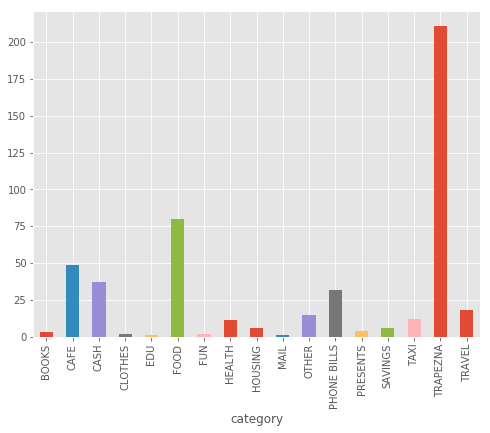

In [75]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
expenses.groupby('category').description.count().plot.bar(ylim=0)
plt.show()

## Using tf-idf
Specifically, for each term in our dataset, we will calculate a measure called Term Frequency, Inverse Document Frequency, abbreviated to tf-idf. 

We will use sklearn.feature_extraction.text.TfidfVectorizer to calculate a tf-idf vector for each of transaction description

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='koi8_u', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(expenses.description).toarray()
labels = expenses.category_num
features.shape

(490, 103)

### Now, each of 490 expense transactions is represented by 140 features, representing the tf-idf score for different unigrams and bigrams.

We can use sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the categories:

In [83]:
category_id_df = expenses[['category', 'category_num']].drop_duplicates().sort_values('category_num')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_num', 'category']].values)
expenses.head()

,date,time,category,description,transaction,abs,currency,balance,weekday,time_range,category_num
1,01.06.2017,18:52,FOOD,"FOOD: ЕЛIТ КЛУБ, Львiв, вул. Луцького, 12",-39.00,39.00,грн,491.31,Thursday,18:00 - 19:59,1
2,01.06.2017,14:48,TRAVEL,"TRAVEL послуги: WWW.UZ.GOV.UA, KYIV",-183.72,183.72,грн,530.31,Thursday,14:00 - 15:59,2
3,01.06.2017,13:23,CAFE,"CAFE: CAFE ""Креденс"", м Львів, вул Валова, 5",-98.00,98.00,грн,714.03,Thursday,12:00 - 13:59,3
5,01.06.2017,11:58,TRAPEZNA,"CAFE: TRAPEZNA UKU, LVIV",-18.00,18.00,грн,1013.03,Thursday,10:00 - 11:59,4
6,01.06.2017,11:55,CASH,"Зняття готівки в банкоматі: KREDOBANK, LVIV",-101.00,100.00,грн,1031.03,Thursday,10:00 - 11:59,5


In [87]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for category, category_num in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_num)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(category))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:]).encode('ascii', 'ignore').decode('ascii')
))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:]).encode('ascii', 'ignore').decode('ascii')
))

# 'BOOKS':
  . Most correlated unigrams:
. lviv
. kyiv
  . Most correlated bigrams:
. trapezna uku
. cafe trapezna
# 'CAFE':
  . Most correlated unigrams:
. cafe
. 7
  . Most correlated bigrams:
.  7
. cafe cafe
# 'CASH':
  . Most correlated unigrams:
. kredobank
. 
  . Most correlated bigrams:
.  
.  
# 'CLOTHES':
  . Most correlated unigrams:
. 
. i
  . Most correlated bigrams:
. trapezna uku
. cafe trapezna
# 'EDU':
  . Most correlated unigrams:
. lviv
. cafe
  . Most correlated bigrams:
. trapezna uku
. cafe trapezna
# 'FOOD':
  . Most correlated unigrams:
. 45
. food
  . Most correlated bigrams:
. food 
.  45
# 'FUN':
  . Most correlated unigrams:
. 
. id
  . Most correlated bigrams:
. cafe trapezna
. id 
# 'HEALTH':
  . Most correlated unigrams:
. kyiv
. health
  . Most correlated bigrams:
. id 
. i 
# 'HOUSING':
  . Most correlated unigrams:
. 
. housing
  . Most correlated bigrams:
.  
.  
# 'MAIL':
  . Most correlated unigrams:
. 
. 
  . Most correlated bigrams:
.  
. i 
# 'OT

### After all the above data transformation, now that we have all the features and labels, it is time to train the classifiers. There are a number of algorithms we can use for this type of problem.

Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant:

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(expenses['description'], expenses['category'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

### After fitting the training set, let’s make some predictions.



In [94]:
print(clf.predict(count_vect.transform([
    "LVIV UCU"
])))
print(clf.predict(count_vect.transform([
    "Поповнення мобільного"
])))

['TRAPEZNA']
['PHONE BILLS']


### Model Selection
We are now ready to experiment with different machine learning models, evaluate their accuracy and find the source of any potential issues.

We will benchmark the following four models:

- Logistic Regression
- (Multinomial) Naive Bayes
- Linear Support Vector Machine
- Random Forest

/Users/tanyabatsenko/anaconda/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/tanyabatsenko/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/tanyabatsenko/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


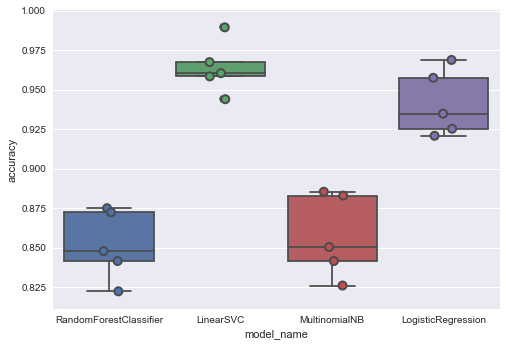

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5

cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [96]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.963882
LogisticRegression        0.941401
MultinomialNB             0.857307
RandomForestClassifier    0.851836
Name: accuracy, dtype: float64

LinearSVC and Logistic Regression perform better than the other two classifiers, with LinearSVC having a slight advantage with a median accuracy of around 96% - which is very good!

### Model Evaluation
Continue with our best model (LinearSVC), we are going to look at the confusion matrix, and show the discrepancies between predicted and actual labels.



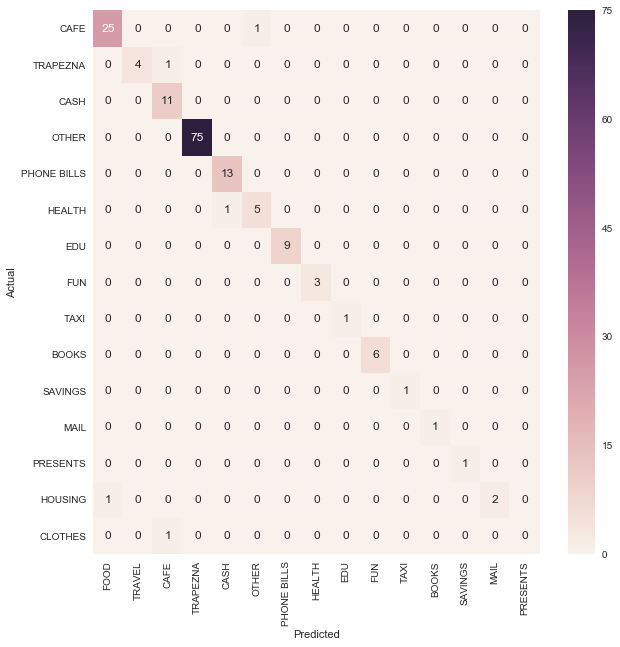

In [97]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, expenses.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Not bad, we see that a lot of 'others' are misclassified as TRAPEZNA, but that can happen

This model now can be used for other data from Privat24 !

# Conclusions 

Categories classification done by PrivatBank is poor

A lot of insights from analyzing expenses withing different time-ranges: weekdays, hours

Great results with LinearSVC that predicts the category by given description which can be used for other users data


### The End.